## DOT言語

In [3]:
import pydot
#有向グラフ(矢印あり)　
"""
digraph yuukou { // directed graph
  a -> b;
}
"""

#無向グラフ(矢印なし)
"""
graph mukou {
  a – b;
}
"""


'\ngraph mukou {\n  a – b;\n}\n'

digraph G {
dpi=250;
fontsize="9.5";
margin=0;
pad=0;
rankdir=LR;
splines=false;
node [label="", penwidth="0.35", shape=circle];
edge [arrowsize="0.5", penwidth="0.35"];
subgraph cluster_i {
fontcolor=red;
label=Input;
margin=0;
penwidth=0;
i1 [color=red];
i2 [color=red];
i3 [color=red];
}

subgraph cluster_h {
fontcolor=blue;
label=Hidden;
margin=0;
penwidth=0;
h1 [color=blue];
h2 [color=blue];
h3 [color=blue];
h4 [color=blue];
}

subgraph cluster_o {
fontcolor=darkgreen;
label=Output;
margin=0;
penwidth=0;
o1 [color=darkgreen];
o2 [color=darkgreen];
}

i1 -> h1;
i1 -> h2;
i1 -> h3;
i1 -> h4;
i2 -> h1;
i2 -> h2;
i2 -> h3;
i2 -> h4;
i3 -> h1;
i3 -> h2;
i3 -> h3;
i3 -> h4;
h1 -> o1;
h1 -> o2;
h2 -> o1;
h2 -> o2;
h3 -> o1;
h3 -> o2;
h4 -> o1;
h4 -> o2;
}



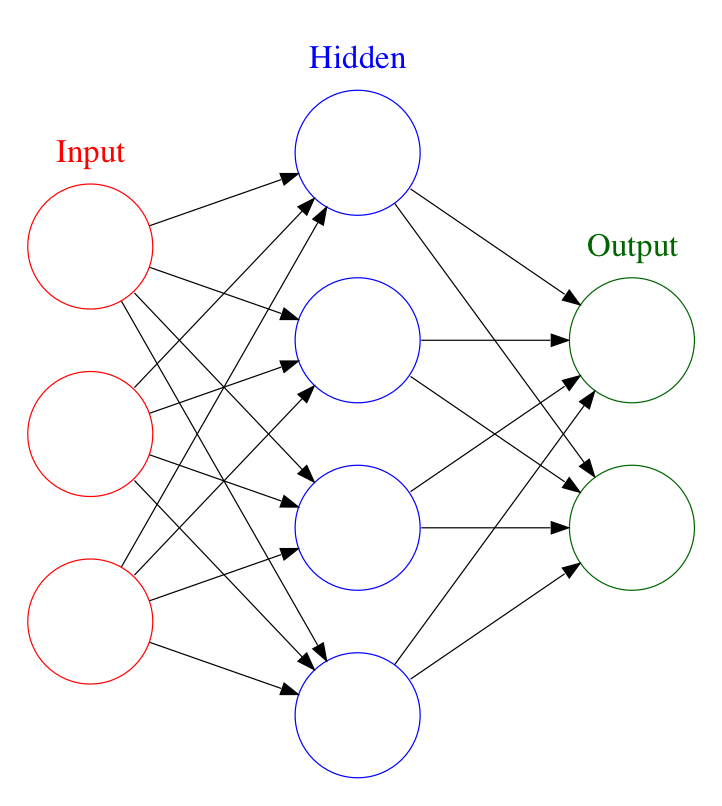

In [2]:
#これをそのまま使うのはやりたくないのでpythonからアクセスしたい　=> pydot

import  pydot

G = pydot.Dot(graph_type='digraph',rankdir='LR',splines='false',dpi='250',pad='0',margin='0',fontsize='9.5')
G.set_node_defaults(label='',shape='circle',penwidth='0.35')
G.set_edge_defaults(arrowsize='0.5',penwidth='0.35')

I = pydot.Subgraph('cluster_i',graph_type='digraph',label='Input',margin='0',fontcolor='red',penwidth='0')
for i in range(1,4):
    I.add_node(pydot.Node("i%d" % i, color='red'))

H = pydot.Subgraph('cluster_h',graph_type='digraph',label='Hidden',margin='0',fontcolor='blue',penwidth='0')
for i in range(1,5):
    H.add_node(pydot.Node("h%d" % i, color='blue'))

O = pydot.Subgraph('cluster_o',graph_type='digraph',label='Output',margin='0',fontcolor='darkgreen',penwidth='0')
for i in range(1,3):
    O.add_node(pydot.Node("o%d" % i, color='darkgreen'))

G.add_subgraph(I)
G.add_subgraph(H)
G.add_subgraph(O)

#ここが矢印を結んでいるところ
for i in range(1,4):
    for j in range(1,5):
        G.add_edge(pydot.Edge('i%d' % i, 'h%d' % j))

for i in range(1,5):
    for j in range(1,3):
        G.add_edge(pydot.Edge('h%d' % i, 'o%d' % j))

print(G)
G.write_png('pydot_ann.png')
from IPython.display import Image
Image("pydot_ann.png")

In [23]:
#決定木の可視化
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

tree.export_graphviz(
        clf,
        out_file="",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [24]:
!dot -Tpng py_iris.dot -o py_iris.png

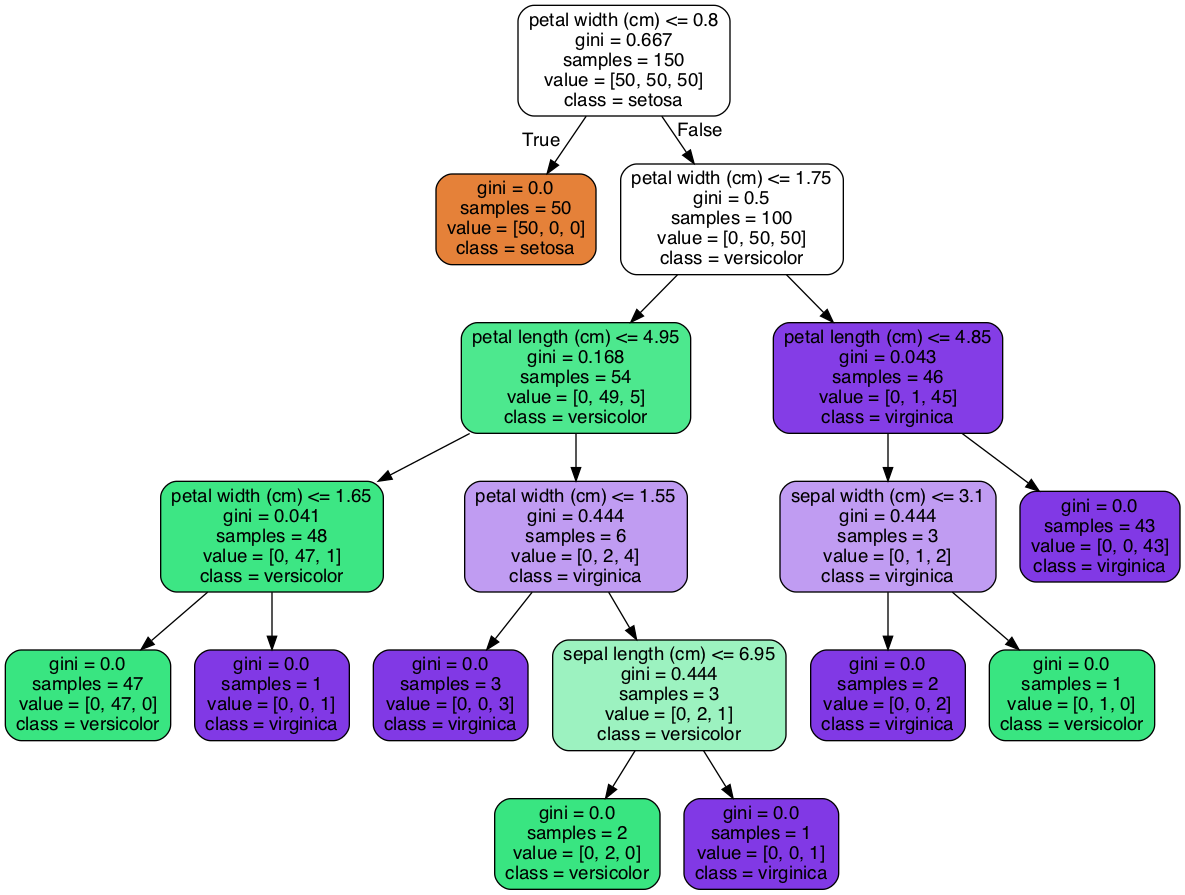

In [26]:
Image("py_iris.png")